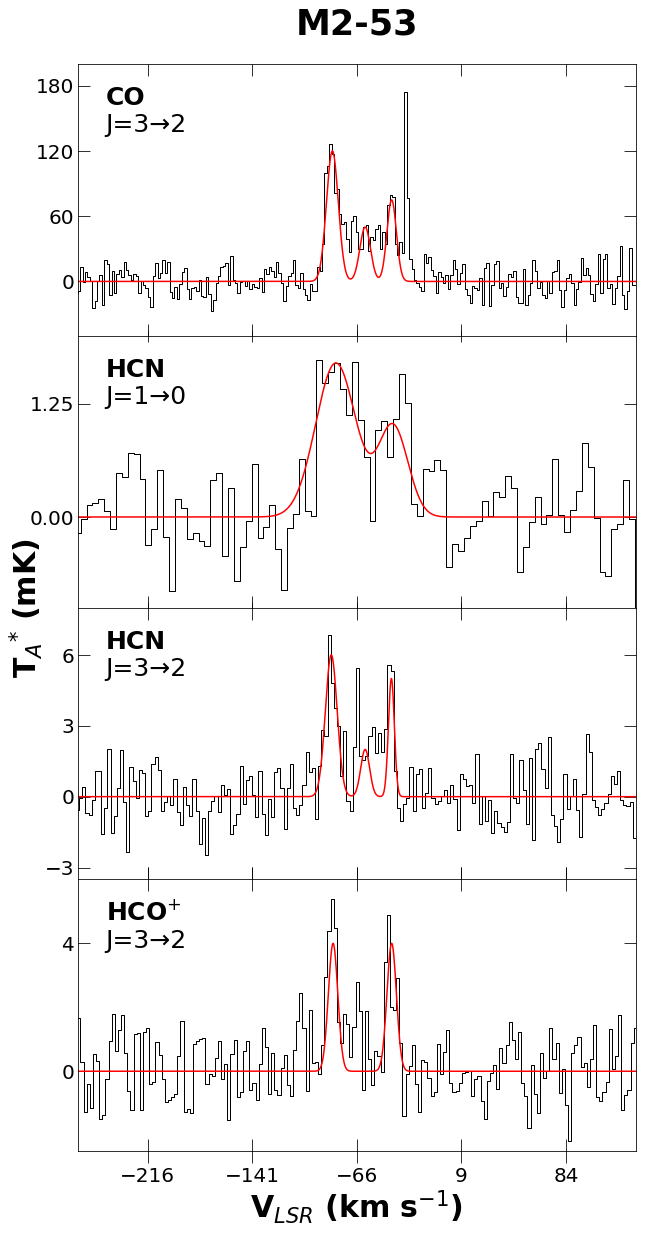

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import xlrd
from matplotlib import gridspec
import string

#---------------------------------------------------------

#top most plot: HCN(1-0)
loc = "C:/Users/sophi/Downloads/m253hcn10_1.25mhz.xlsx"
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 

hcn10vel = [] #velocity
hcn10ta = []  # antenna temperature

for i in range(sheet.nrows): 
    row = sheet.row(i)
    cell_values = [] 
    for cell in row: 
        cell_values.append(cell.value)
    hcn10vel.append(cell_values[0]) 
    hcn10ta.append(1000*cell_values[1])
#print(hcn10vel)
    
#---------------------------------------------------------

#second from top HCN(3-2)
loc = "C:/Users/sophi/Downloads/m253hcn32_2mhz.xlsx"
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

hcn32vel = []
hcn32ta = []

for i in range(sheet.nrows):
    row = sheet.row(i)
    cell_values = []
    for cell in row:
        cell_values.append(cell.value)
    hcn32vel.append(cell_values[0])
    hcn32ta.append(1000*cell_values[1])
    
#---------------------------------------------------------
    
#bottom plot HCO+(3-2), detection  
loc = "C:/Users/sophi/Downloads/m253hco32_2mhz.xlsx"
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

hco32vel = []
hco32ta = []

for i in range(sheet.nrows):
    row = sheet.row(i)
    cell_values = []
    for cell in row:
        cell_values.append(cell.value)
    hco32vel.append(cell_values[0])
    hco32ta.append(1000*cell_values[1])
#---------------------------------------------------------

#CO plot
loc = "C:/Users/sophi/Downloads/m253co32_2mhz.xlsx"
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

co32vel = []
co32ta = []

for i in range(sheet.nrows):
    row = sheet.row(i)
    cell_values = []
    for cell in row:
        cell_values.append(cell.value)
    co32vel.append(cell_values[0])
    co32ta.append(1000*cell_values[1])
#--------------------------------------------------------------

fig, ax = plt.subplots(4, sharex=True, sharey=False, gridspec_kw={'hspace':0}) 

fig.add_subplot(111, frameon=False) #no frame
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

xstart = -266
xend = 134
xrange = np.linspace(xstart, xend, 100*(xend-xstart))

a_1_0 = 120
b_1_0 = -83.5
c_1_0 = 10/2.35482
a_2_0 = 50
b_2_0 = -60
c_2_0 = 9/2.35482
a_3_0 = 75
b_3_0 = -41
c_3_0 = 8/2.35482
yrange_0 = a_1_0*np.exp(-((xrange - b_1_0)**2)/(2*((c_1_0)**2))) + a_2_0*np.exp(-((xrange - b_2_0)**2)/(2*((c_2_0)**2))) + a_3_0*np.exp(-((xrange - b_3_0)**2)/(2*((c_3_0)**2)))

a_1_1 = 1.7
b_1_1 = -81
c_1_1 = 34/2.35482
a_2_1 = 1
b_2_1 = -40
c_2_1 = 25/2.35482
yrange_1 = a_1_1*np.exp(-((xrange - b_1_1)**2)/(2*((c_1_1)**2))) + a_2_1*np.exp(-((xrange - b_2_1)**2)/(2*((c_2_1)**2)))

a_1_2 = 6
b_1_2 = -84.3
c_1_2 = 10/2.35482
a_2_2 = 2
b_2_2 = -60
c_2_2 = 7.5/2.35482
a_3_2 = 5
b_3_2 = -41.2
c_3_2 = 5/2.35482
yrange_2 = a_1_2*np.exp(-((xrange - b_1_2)**2)/(2*((c_1_2)**2))) + a_2_2*np.exp(-((xrange - b_2_2)**2)/(2*((c_2_2)**2))) + a_3_2*np.exp(-((xrange - b_3_2)**2)/(2*((c_3_2)**2)))

a_1_3 = 4
b_1_3 = -83
c_1_3 = 8/2.35482
a_2_3 = 4
b_2_3 = -41
c_2_3 = 8/2.35482
yrange_3 = a_1_3*np.exp(-((xrange - b_1_3)**2)/(2*((c_1_3)**2))) + a_2_3*np.exp(-((xrange - b_2_3)**2)/(2*((c_2_3)**2)))

ax[1].plot(hcn10vel, hcn10ta, drawstyle='steps', color='black', linewidth=1)
ax[1].plot(xrange, yrange_1, color='red')
ax[2].plot(hcn32vel, hcn32ta, drawstyle='steps', color='black', linewidth=1)
ax[2].plot(xrange, yrange_2, color='red')
ax[3].plot(hco32vel, hco32ta, drawstyle='steps', color='black', linewidth=1)
ax[3].plot(xrange, yrange_3, color='red')
ax[0].plot(co32vel, co32ta, drawstyle='steps', color='black', linewidth=1)
ax[0].plot(xrange, yrange_0, color='red')

ax[0].set_xlim(-266, 134) #change this, all the same, 200 above and below center
ax[1].set_xlim(-266, 134) 
ax[2].set_xlim(-266, 134) 
ax[3].set_xlim(-266, 134) 

ax[0].tick_params(axis='y', direction='in', length=12, right=True, labelsize=20) 
ax[0].tick_params(axis='x', direction='in', length=12, top=True, labelsize=20)
ax[1].tick_params(axis='y', direction='in', length=12, right=True, labelsize=20)
ax[1].tick_params(axis='x', direction='inout', length=12, top=True, labelsize=20)

ax[2].tick_params(axis='y', direction='in', length=12, right=True, labelsize=20)
ax[2].tick_params(axis='x', direction='inout', length=24, top=True, labelsize=20)
ax[3].tick_params(axis='y', direction='in', length=12, right=True, labelsize=20)
ax[3].tick_params(axis='x', direction='inout', length=24, top=True, labelsize=20)

ax[0].set_xticks(np.arange(-216, 85, 75)) #change this, set so 4-5 ticks across x-axis, want one at center vel., start, stop, step
ax[1].set_xticks(np.arange(-216, 85, 75))
ax[2].set_xticks(np.arange(-216, 85, 75))
ax[3].set_xticks(np.arange(-216, 85, 75))

#change below, all be different, don't want anything to be cut off, play around with for each spectra
ax[1].set_yticks(np.arange(-1.25, 3, 1.25)) #minimum, max, delta, same process for xticks, 1 tick at zero
ax[1].set_ylim(-1, 2)
ax[2].set_yticks(np.arange(-3, 8, 3)) #minimum, max, delta
ax[2].set_ylim(-3.5, 8)
ax[3].set_yticks(np.arange(-4, 7, 4)) #minimum, max, delta
ax[3].set_ylim(-2.5, 6)
ax[0].set_yticks(np.arange(-60, 200, 60)) #minimum, max, delta
ax[0].set_ylim(-50, 200)

ax[1].text(0.05, 0.85, 'HCN', transform=ax[1].transAxes, size=25, weight='bold') 
ax[1].text(0.05, 0.75, 'J=1→0', transform=ax[1].transAxes, size=25)

ax[2].text(0.05, 0.85, 'HCN', transform=ax[2].transAxes, size=25, weight='bold') 
ax[2].text(0.05, 0.75, 'J=3→2', transform=ax[2].transAxes, size=25)

ax[3].text(0.05, 0.85, 'HCO$^{+}$', transform=ax[3].transAxes, size=25, weight='bold') 
ax[3].text(0.05, 0.75, 'J=3→2', transform=ax[3].transAxes, size=25)

ax[0].text(0.05, 0.85, 'CO', transform=ax[0].transAxes, size=25, weight='bold') 
ax[0].text(0.05, 0.75, 'J=3→2', transform=ax[0].transAxes, size=25)

plt.xlabel("V$_{LSR}$ (km s$^{-1}$)", size=30, weight='bold',labelpad=20)
plt.ylabel("T$_{A}$$^{*}$ (mK)", size=30, weight='bold', labelpad=10) 

ax[0].set_title("M2-53", size=35, weight='bold', pad=30) 
#plt.subplots_adjust(hspace=.0)

fig.set_figheight(20) 
fig.set_figwidth(10) 
#change below to place where you want to save figure, name m417_2MHz.jpg is good
fig.savefig("C:/Users/sophi/Downloads/m253_2MHz_gaussian.jpg", format='jpg', bbox_inches='tight') 
plt.show()